## Augmentation and label corrections

This notebook takes a label and generates (potentially hundreds) of augmented labels from it.  This notebook also uses Napari to correct the existing labels (which are often from a previous model which needs to be fine-tuned)

## Load previous labels

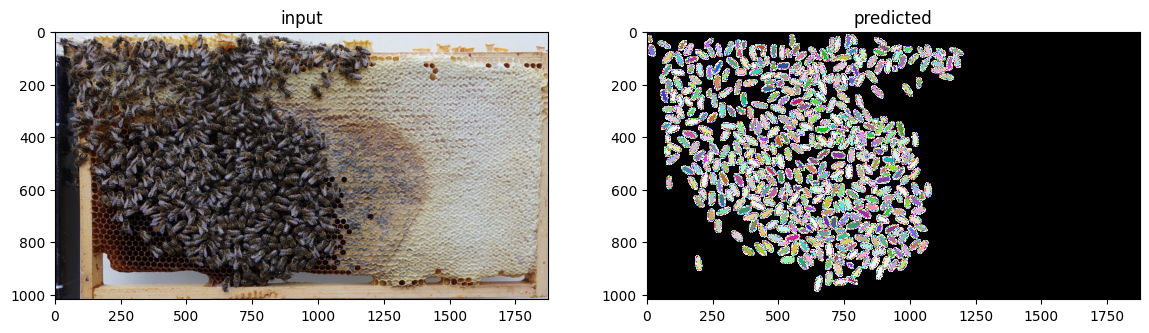

In [6]:
from skimage.io import imread
from pathlib import Path
from tnia.plotting.plt_helper import imshow_multi2d
import numpy as np
from tnia.deeplearning.dl_helper import random_label_cmap
from csbdeep.utils import normalize

tnia_images_path = Path(r'D:\images')
parent_path=Path(tnia_images_path / r'tnia-python-images/imagesc/2023_12_20_segmenting_bees')
label_path = parent_path / 'labels'
patch_path = parent_path / 'patches'

#test_name='bsp1-2.jpg'
test_name='bee1-s.tif'

label_name = test_name.split('.')[0]+'-labels-from-model1.tif'

image = imread(parent_path  / test_name) 

labels = imread(label_path / label_name)

fig = imshow_multi2d([image,labels],['input','predicted'],1,2, width=14, height=8,colormaps=['gray', random_label_cmap()])

## Correct previous labels with Napari

View previous labels in Napari.  Look for mistakes and correct. 

In [9]:
import napari
viewer = napari.Viewer()

viewer.add_image(image, name='image')
viewer.add_labels(labels, name='labels')

<Labels layer 'labels' at 0x15db1c6cd30>

## Plot labels again to verify corrections

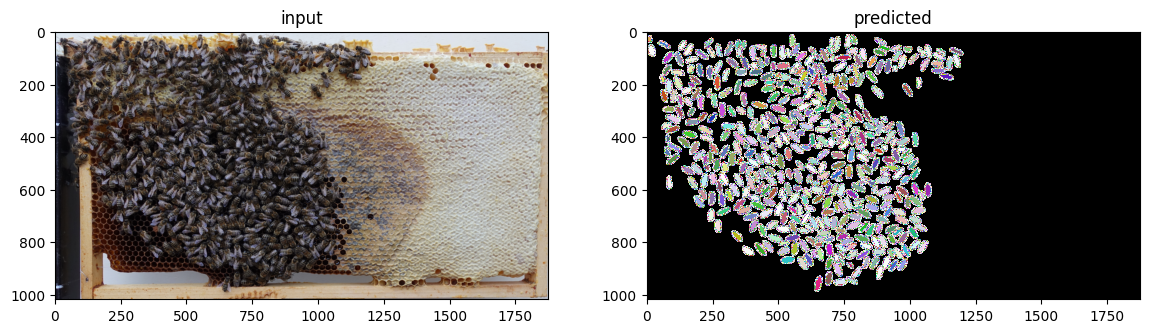

In [10]:
fig = imshow_multi2d([image,labels],['input','predicted'],1,2, width=14, height=8,colormaps=['gray', random_label_cmap()])

## Normalize label before augmentatioa

It is often better to normalize the larger image before creating patches.  Otherwise the patches will be normalized using the min and max of only a small sample of the data.   During prediction normalization is done using the range of the entire image, so it is helpful to also normalize the patches using the range of the entire image. 

In [4]:
image = normalize(image,1,99.8, axis=(0,1))

## Augment 

We call the function uber_augmenter which will create a few hundred cropped, potentially scaled, gamma and color adjusted patch images from the larger label image. 

In [6]:
from tnia.deeplearning.augmentation import uber_augmenter
import os

if not os.path.exists(patch_path):
    os.mkdir(patch_path)
axes = 'YX'
sub_sample = 1

uber_augmenter(image, labels, patch_path, 'bees', 256, 500, do_random_sized_crop=False, do_random_gamma=True, do_color_jitter=True)



c:\Users\bnort\miniconda3\envs\segment_bees_311\lib\site-packages\pydantic\main.py:347: UserWarning: Pydantic serializer warnings:
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(
c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deeplearning\augmentation.py:221: UserWarning: D:\images\tnia-python-images\imagesc\2023_12_20_segmenting_bees\patches\ground truth0\bees_0.tif is a low contrast image
  imsave(label_name, label_aug)
c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deeplearning\augmentation.py:221: UserWarning: D:\images\tnia-python-images\imagesc\2023_12_20_segmenting_bees\patches\ground truth0\bees_1.tif is a low contrast image
  imsave(label_name, label_aug)
c: